In [1]:
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit import BasicAer
from qiskit import execute
from qiskit.visualization import plot_histogram

# Setup
coupling_map = [[0, 1], [0, 2], [1, 2], [3, 2], [3, 4], [4, 2]]
backend = BasicAer.get_backend("qasm_simulator")

In [2]:
# Create éléments
q = QuantumRegister(3, "q")
c0 = ClassicalRegister(1, "c0")
c1 = ClassicalRegister(1, "c1")
c2 = ClassicalRegister(1, "c2")
qc = QuantumCircuit(q, c0, c1, c2, name="teleport")

# Initial state
qc.u3(0.3, 0.2, 0.1, q[0])

# Prepare a Bell pair
qc.h(q[1])
qc.cx(q[1], q[2])

# Barrier following state preparation
qc.barrier(q)

# Measure in the Bell basis
qc.cx(q[0], q[1])
qc.h(q[0])

qc.measure(q[0], c0[0])
qc.measure(q[1], c1[0])

# Correction
qc.barrier(q)
qc.z(q[2]).c_if(c0, 1)
qc.x(q[2]).c_if(c1, 1)
qc.measure(q[2], c2[0])

print(qc)

        ┌─────────────────┐      ░      ┌───┐┌─┐ ░                  
q_0: |0>┤ U3(0.3,0.2,0.1) ├──────░───■──┤ H ├┤M├─░──────────────────
        └──────┬───┬──────┘      ░ ┌─┴─┐└┬─┬┘└╥┘ ░                  
q_1: |0>───────┤ H ├─────────■───░─┤ X ├─┤M├──╫──░──────────────────
               └───┘       ┌─┴─┐ ░ └───┘ └╥┘  ║  ░  ┌───┐  ┌───┐ ┌─┐
q_2: |0>───────────────────┤ X ├─░────────╫───╫──░──┤ Z ├──┤ X ├─┤M├
                           └───┘ ░        ║   ║  ░  └─┬─┘  └─┬─┘ └╥┘
                                              ║    ┌──┴──┐   │    ║ 
c0_0: 0 ══════════════════════════════════════╩════╡ = 1 ╞═══╪════╬═
                                          ║        └─────┘┌──┴──┐ ║ 
c1_0: 0 ══════════════════════════════════╩═══════════════╡ = 1 ╞═╬═
                                                          └─────┘ ║ 
c2_0: 0 ══════════════════════════════════════════════════════════╩═
                                                                    


{'1 1 0': 6, '0 1 1': 245, '0 0 0': 253, '1 0 1': 4, '0 1 0': 226, '0 0 1': 276, '1 0 0': 5, '1 1 1': 9}


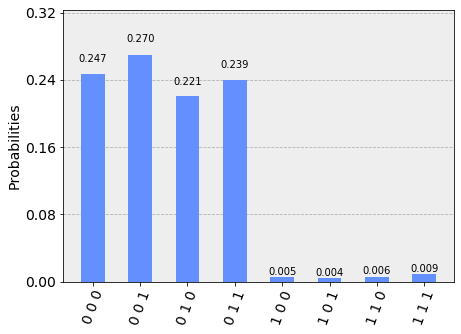

In [3]:
initial_layout = {
    q[0]: 0,
    q[1]: 1,
    q[2]: 2
}

job = execute(qc, backend=backend, coupling_map=coupling_map, shots=1024, initial_layout=initial_layout)
result = job.result()
counts = result.get_counts(qc)

print(counts)
plot_histogram(counts)